## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import tqdm
from timeit import default_timer as timer

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

C:\Users\fre_f\anaconda3\envs\FF\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
prefix = 'c:/users/fre_f/PythonProjects/Bacteriological/Data/'
df = pd.read_csv(prefix+'DESL.csv')

In [3]:
df.head()

,Index,DESL,None;Other,Archaea;Euryarchaeota,Bacteria;Acidobacteria,Bacteria;Actinobacteria,Bacteria;Armatimonadetes,Bacteria;Bacteroidetes,Bacteria;Chlamydiae,Bacteria;Chloro1lexi,...,Light treatment,OSDI score,DEQ5 score,TBUT OD,TBUT OS,OSS OD,OSS OS,Schirmer OD,Schirmer OS,Demodicosis
0,P1,3,0.000000,0.000000,0.0,7.611053,0.0,5.904923,0,0.0,...,0,NaN,NaN,3,3,0,0,23,23,0
1,P2,3,0.000000,0.000000,0.0,63.378147,0.0,0.870340,0,0.0,...,0,31.25,17.0,2,4,1,3,14,18,0
2,P3,2,0.023263,0.714645,0.0,8.328215,0.0,6.578825,0,0.0,...,1,33.30,16.0,8,8,3,3,11,8,0
3,P4,3,0.000000,0.000000,0.0,16.352201,0.0,1.376368,0,0.0,...,0,93.75,21.0,3,2,2,2,12,11,0
4,P5,1,0.016438,0.000000,0.0,22.581454,0.0,3.539356,0,0.0,...,1,6.25,7.0,11,11,0,0,22,32,0


In [4]:
df.iloc[:,2:27]

,None;Other,Archaea;Euryarchaeota,Bacteria;Acidobacteria,Bacteria;Actinobacteria,Bacteria;Armatimonadetes,Bacteria;Bacteroidetes,Bacteria;Chlamydiae,Bacteria;Chloro1lexi,Bacteria;Cyanobacteria,Bacteria;Deinococcus-Thermus,...,Bacteria;NA,Bacteria;Nitrospirae,Bacteria;Parcubacteria,Bacteria;Proteobacteria,Bacteria;Saccharibacteria,Bacteria;Spirochaetae,Bacteria;Synergistetes,Bacteria;Tenericutes,Bacteria;Thermotogae,Bacteria;Verrucomicrobia
0,0.000000,0.000000,0.0,7.611053,0.0,5.904923,0,0.0,1.015293,1.540256,...,0.0,0,0.000000,46.463790,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.000000,0.000000,0.0,63.378147,0.0,0.870340,0,0.0,0.000000,0.000000,...,0.0,0,0.000000,13.216878,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.023263,0.714645,0.0,8.328215,0.0,6.578825,0,0.0,0.000000,0.000000,...,0.0,0,0.000000,34.975713,0.0,0.0,0.0,0.000000,0.0,1.888039
3,0.000000,0.000000,0.0,16.352201,0.0,1.376368,0,0.0,0.000000,0.563752,...,0.0,0,0.000000,42.323743,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.016438,0.000000,0.0,22.581454,0.0,3.539356,0,0.0,0.000000,0.000000,...,0.0,0,0.000000,43.249182,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.015896,0.000000,0.0,32.191817,0.0,1.224026,0,0.0,0.000000,0.000000,...,0.0,0,1.624465,30.641535,0.0,0.0,0.0,0.000000,0.0,0.000000
57,0.000000,0.000000,0.0,11.320520,0.0,6.930579,0,0.0,8.588640,0.000000,...,0.0,0,0.000000,30.034423,0.0,0.0,0.0,0.000000,0.0,0.000000
58,0.000000,0.644642,0.0,27.079510,0.0,3.521175,0,0.0,0.000000,0.000000,...,0.0,0,0.000000,10.804840,0.0,0.0,0.0,0.047583,0.0,0.000000
59,0.000000,0.000000,0.0,72.815363,0.0,1.140051,0,0.0,0.110363,0.000000,...,0.0,0,0.000000,13.968657,0.0,0.0,0.0,0.000000,0.0,0.338815


In [5]:
df.iloc[:,1]

0     3
1     3
2     2
3     3
4     1
     ..
56    3
57    2
58    2
59    2
60    3
Name: DESL, Length: 61, dtype: int64

In [6]:
X = df.iloc[:,2:27]
y = df.iloc[:,1]

In [7]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [8]:
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

## Train, predict and explain

In [9]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
clflgbm = LGBMClassifier(random_state=42)
clflgbm.fit(X, y)
y_pred = clflgbm.predict(X)

In [10]:
print('Accuracy:',accuracy_score(y, y_pred))
print('Balanced accuracy: ',balanced_accuracy_score(y, y_pred))
print('F1 score:',f1_score(y, y_pred,average='weighted'))
print('MCC:', matthews_corrcoef(y, y_pred))
print(confusion_matrix(y, y_pred))

Accuracy: 0.7049180327868853
Balanced accuracy:  0.655241935483871
F1 score: 0.6961372057481502
MCC: 0.5137656929029061
[[ 4  1  3  0]
 [ 0  9  9  0]
 [ 0  4 27  0]
 [ 0  0  1  3]]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

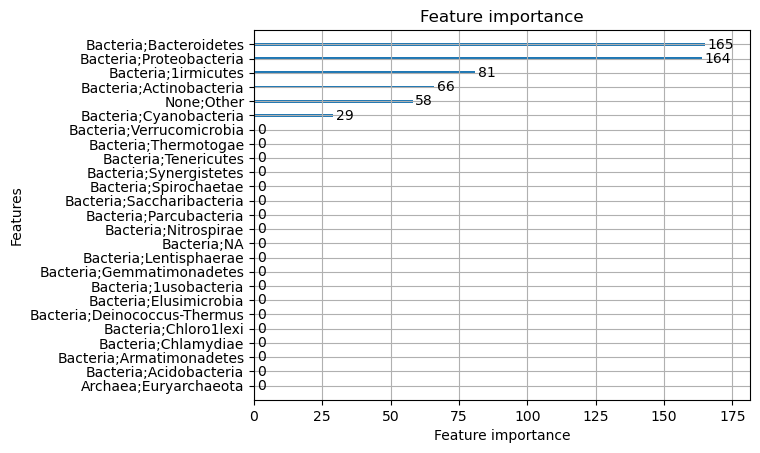

In [11]:
lgb.plot_importance(clflgbm, max_num_features=None, ignore_zero=False)

In [12]:
# Create a SHAP explainer for the LightGBM model

explainerlgbm = shap.Explainer(clflgbm, X)

In [13]:
# Compute SHAP values for the dataset

#shap_valueslgbm = explainerlgbm(X)
shap_valueslgbm = explainerlgbm.shap_values(X.iloc[:,:])

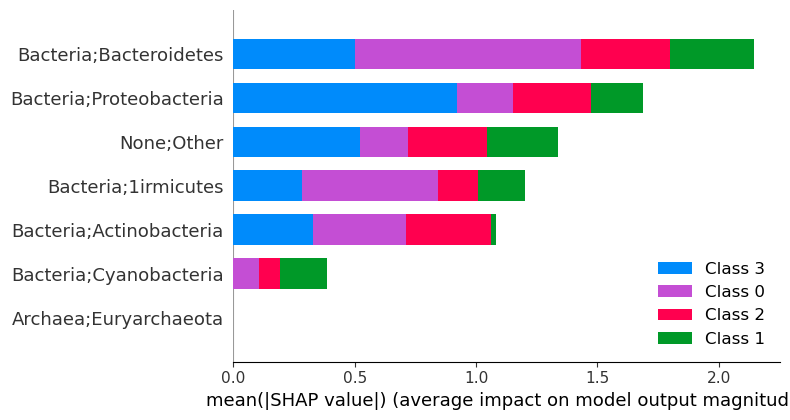

In [14]:
shap.summary_plot(shap_valueslgbm, X, plot_type='bar', max_display=7)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


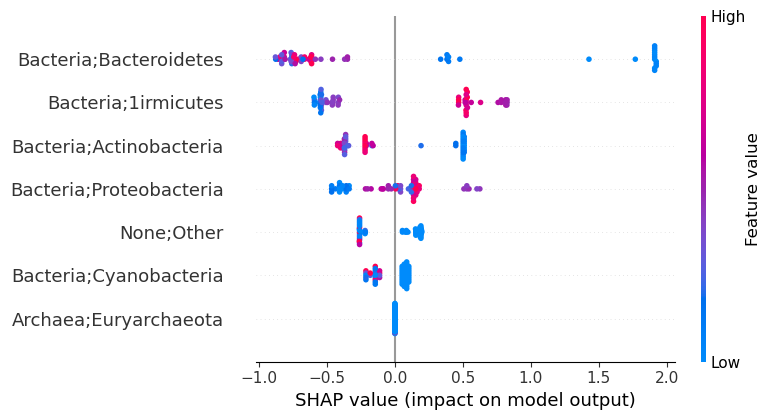

In [15]:
shap.summary_plot(shap_valueslgbm[0], X, max_display=7)

In [22]:
# Make a customized SHAP plot with global values for each feaature

my_features = clflgbm.feature_name_

shap_list0 = []
shap_list1 = []
shap_list2 = []
shap_list3 = []

for i in range(25):
    shap_list0.append(abs(shap_valueslgbm[0][:,i,]).mean())
    shap_list1.append(abs(shap_valueslgbm[1][:,i,]).mean())
    shap_list2.append(abs(shap_valueslgbm[2][:,i,]).mean())
    shap_list3.append(abs(shap_valueslgbm[3][:,i,]).mean())
    
shap_dict = {}
# Add up shap values from all four classes (DESL 1-4)
for i in range(len(shap_list0)):
    shap_dict[my_features[i]] = shap_list0[i]
    shap_dict[my_features[i]] += shap_list1[i]
    shap_dict[my_features[i]] += shap_list2[i]
    shap_dict[my_features[i]] += shap_list3[i]
    
# Sort in decreasing order
shap_dict = {k:v for k, v in sorted(shap_dict.items(), key=lambda item: item[1], reverse=True)}

most_important_features = []
most_important_values = []

for k, v in shap_dict.items():
    most_important_features.append(k)
    most_important_values.append(v)
    
# Choose top 7 features
#most_important_features = most_important_features[:7]
#most_important_values = most_important_values[:7]

most_important_features.reverse()
most_important_values.reverse()

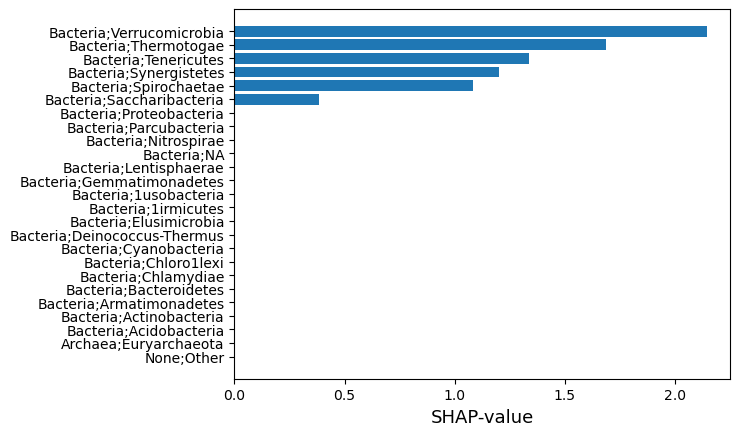

In [23]:
plt.barh(my_features, most_important_values)
ax = plt.gca()
plt.xlabel('SHAP-value', size=13)
plt.show()

In [47]:
from sklearn.neural_network import MLPClassifier
clfmlp = MLPClassifier(solver="adam", activation="relu", learning_rate="constant", random_state=42, max_iter=3000, verbose=False)
clfmlp.out_activation_="softmax"
clfmlp.fit(X, y)
y_predmlp = clfmlp.predict(X)

In [48]:
print('Accuracy:',accuracy_score(y, y_predmlp))
print('Balanced accuracy: ',balanced_accuracy_score(y, y_predmlp))
print('F1 score:',f1_score(y, y_predmlp,average='weighted'))
print('MCC:', matthews_corrcoef(y, y_predmlp))
print(confusion_matrix(y, y_predmlp))

Accuracy: 0.9836065573770492
Balanced accuracy:  0.9861111111111112
F1 score: 0.9835024720270621
MCC: 0.974398280806329
[[ 8  0  0  0]
 [ 0 17  1  0]
 [ 0  0 31  0]
 [ 0  0  0  4]]


In [49]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clfmlp,X, y,n_repeats=20, random_state = 42)

In [50]:
MLPfeatures = pd.DataFrame(clfmlp.feature_names_in_,columns=['Features'])
MLPfeatures['Importance_values'] = result.importances_mean.tolist()
#Sort by importance
MLPfeatures = MLPfeatures.sort_values(by = 'Importance_values',ascending=True)
#Remove features with importance =0
MLPfeatures=MLPfeatures[MLPfeatures['Importance_values']!=0]

In [ ]:
#MLPfeatures20 = MLPfeatures.iloc[-20:,:]

In [ ]:
#MLPfeatures

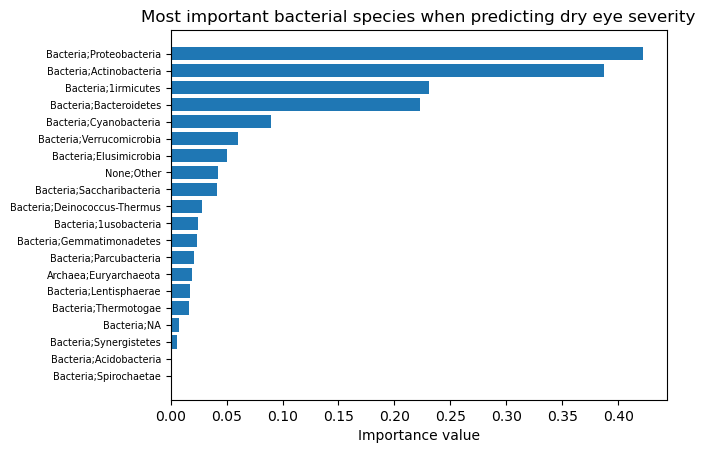

In [51]:
plt.title('Most important bacterial species when predicting dry eye severity')
plt.xlabel('Importance value')
plt.yticks(size=7)
#plt.barh(feature_dfRightZ['Features'],feature_dfRightZ['Importance_values'], height=0.8)
plt.barh(MLPfeatures['Features'], MLPfeatures['Importance_values'], height=0.8)
#plt.savefig('c:/users/fre_f/CBMSfigs/MLPpermOD.jpeg',bbox_inches='tight')
plt.show()